**准备工作：依次点击每个代码框右侧的播放按钮，逐步运行代码。**

In [1]:
!pip install matplotlib
!pip install scipy

import random
from collections import Counter
from statistics import stdev

def toss_coin():
    # 随机生成一个0或1
    # 如果生成的数字是0，代表“反面”，否则代表“正面”
    result = random.choice(['正面', '反面'])
    return result

def toss_coin_multiple_times(n):
    """
    连续掷硬币n次，并返回“正面”出现的次数。
    
    参数:
    n -- 掷硬币的次数
    
    返回值:
    heads_count -- “正面”出现的次数
    """
    # 初始化正面出现的次数
    heads_count = 0

    # 连续掷n次硬币
    for _ in range(n):
        # 掷一次硬币并获取结果
        result = toss_coin()
        # 如果结果是“正面”，则增加正面出现的次数
        if result == '正面':
            heads_count += 1

    return heads_count

def simulate_coin_tosses(tosses_per_trial, trials):
    """
    模拟掷硬币n次的游戏，并进行trials次试验，统计每种正面出现次数的概率。
    
    参数:
    n -- 每次试验中掷硬币的次数
    tosses_per_trial -- 每次试验掷硬币的次数
    trials -- 试验的总次数
    
    返回值:
    probabilities -- 一个包含每种正面出现次数概率的字典
    """
    # 初始化一个Counter对象来记录每种正面次数的出现情况
    counts = Counter()

    # 进行trials次试验
    for _ in range(trials):
        # 掷硬币tosses_per_trial次，并记录正面出现的次数
        coin_tosses = [toss_coin() for _ in range(tosses_per_trial)]
        heads_count = sum(1 for toss in coin_tosses if toss == '正面')
        # 更新记录
        counts[heads_count] += 1

    # 计算每种正面次数的概率
    probabilities = {k: v / trials for k, v in counts.items()}
    return probabilities

def calculate_stddev_from_probabilities(probabilities,trials):
    """
    使用给定的概率分布计算正面出现次数的标准差。
    
    参数:
    probabilities -- 一个包含每种正面出现次数概率的字典
    
    返回值:
    stddev -- 正面次数的标准差
    """
    # 提取正面出现次数和对应的概率
    heads_counts, probabilities_list = zip(*probabilities.items())
    # 计算均值
    mean = sum([count * prob for count, prob in zip(heads_counts, probabilities_list)])
    # 计算方差
    variance = 0
    for heads_count, probability in sorted(probabilities.items()):
        variance = variance + (heads_count-mean)**2 * probability
    # 计算标准差
    stddev = variance ** 0.5
    return mean,stddev

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Could not fetch URL https://pypi.tuna.tsinghua.edu.cn/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.tuna.tsinghua.edu.cn', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:1129)'))) - skipping
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Could not fetch URL https://pypi.tuna.tsinghua.edu.cn/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.tuna.tsinghua.edu.cn', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:1129)'))) - skipping


**第一步. 掷硬币游戏**

In [2]:
print(toss_coin())

反面


**第二步.掷好多次硬币，看看出现多少次“正面”**

In [4]:
# 调用函数，掷7次硬币，并打印“正面”出现的次数
n = 7
heads_count = toss_coin_multiple_times(n)
print(f"掷硬币{n}次，'正面'出现了{heads_count}次。")

掷硬币7次，'正面'出现了5次。


**第三步.构建一个“永不关门的赌场”，不停的赌，堵上10万次**

In [7]:
# 设置参数
trials = 10000000  # 试验的总次数

# 调用函数进行模拟
probabilities = simulate_coin_tosses(n, trials)
# 打印结果
for heads_count, probability in sorted(probabilities.items()):
    print(f"出现{heads_count}次正面的次数是：{probability*trials:.0f}，概率是: {probability:.4f}")

出现0次正面的次数是：77874，概率是: 0.0078
出现1次正面的次数是：547841，概率是: 0.0548
出现2次正面的次数是：1639706，概率是: 0.1640
出现3次正面的次数是：2732043，概率是: 0.2732
出现4次正面的次数是：2735365，概率是: 0.2735
出现5次正面的次数是：1642043，概率是: 0.1642
出现6次正面的次数是：547086，概率是: 0.0547
出现7次正面的次数是：78042，概率是: 0.0078


**第四步.做一些统计**

In [23]:
# 计算标准差
heads_mean,heads_stddev = calculate_stddev_from_probabilities(probabilities,trials)

# 打印结果
print(f"掷出正面次数的平均值是: {heads_mean:.2f},掷出正面次数的标准差是: {heads_stddev:.2f}")

掷出正面次数的平均值是: 3.51,掷出正面次数的标准差是: 1.38


**看看概率各正面次数出现的概率分布**

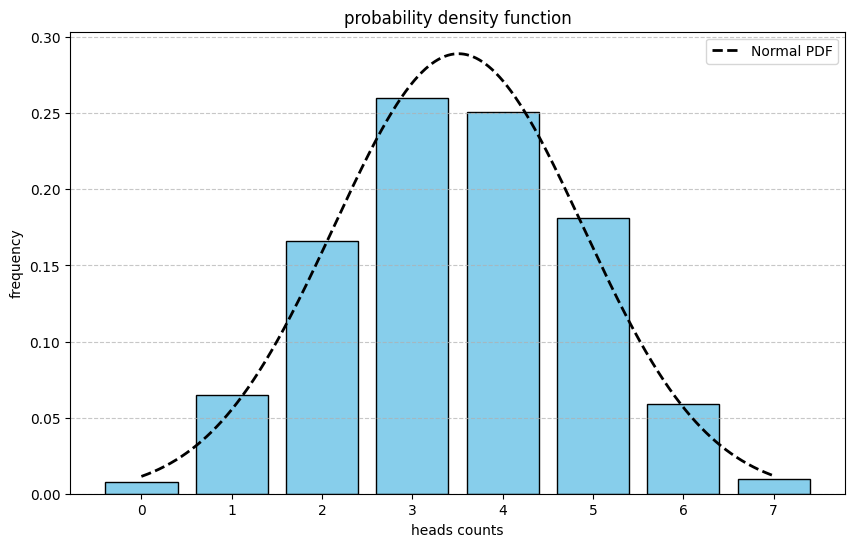

In [24]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

# 提取正面出现次数
heads_counts = list(probabilities.keys())
# 提取概率
probabilities_list = list(probabilities.values())

# 将概率转换为频率
frequencies = [prob * trials for prob in probabilities_list]

# 生成正态分布数据点
x = np.linspace(min(heads_counts), max(heads_counts), trials)
pdf = norm.pdf(x, heads_mean, heads_stddev)

# 绘制直方图
plt.figure(figsize=(10, 6))
bars = plt.bar(heads_counts, probabilities_list, color='skyblue', edgecolor='black')
# 在同一图上绘制正态分布PDF曲线
plt.plot(x, pdf, 'k--', linewidth=2, label='Normal PDF')

plt.title('probability density function')  # 设置图形的标题
plt.xlabel('heads counts')  # 设置x轴的标签
plt.ylabel('frequency')  # 设置y轴的标签
plt.xticks(heads_counts)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

**第五步.来赌博吧！**

用户（闲家）可以对正面向上的次数进行下注（即0次至7次），每注需要花费1元；

如果**硬币正面向上的次数<=闲家下注的次数**，则闲家赢，**庄家需按照赔率表支付闲家**；反之，则庄家赢，**下注金额不返还**。

举例：闲家如下注3次正面，下1注，支付1元。若最终结果为0次、1次、2次、3次这四种情况，则闲家赢。根据赔率表，下注3次正面的赔率为2，则庄家向闲家每注返还2元。因此这场游戏闲家共计赢得1元。

In [33]:
game_cost = 1  # 每注的成本
possible_bets = list(range(n+1))  # 所有可能的下注选项：0次至7次正面

# 用户输入下注
print("欢迎来到掷硬币小游戏！")
print("你可以对正面向上的次数进行下注（0-7次）。")
print("每次下注需要花费1元。")
bet = int(input("您对下注几次正面？请输入："))
game_trials = int(input("您想玩几次？请输入："))
all_spend = game_trials
print(f"下注完成，您对{bet}次正面下注了{all_spend}元")
# 调用函数进行模拟
probabilities = simulate_coin_tosses(n, game_trials)

odds = [125,15,4,2,1.25,1.1,1.01,1]
pro = 0
return_all = 0
for heads_count, probability in sorted(probabilities.items()):
    pro = pro + probability
    if bet == heads_count:
        fre = int(round(pro*game_trials,0))
        return_money = odds[heads_count] * fre
        return_all = return_all + return_money

print("您总共赚了{:.2f}元".format(return_all - all_spend))


欢迎来到掷硬币小游戏！
你可以对正面向上的次数进行下注（0-7次）。
每次下注需要花费1元。
下注完成，您对4次正面下注了1000元
您总共赚了-20.00元


**第六步.你来做庄！**

如果你是庄家，你会如何设置赔率？

In [12]:
game_cost = 1  # 每注的成本
possible_bets = list(range(n+1))  # 所有可能的下注选项：0次至7次正面

# 用户输入下注
print("欢迎进入游戏后台")
print("你可以对正面向上的次数（0-7次）的赔率进行调整。")
odds = [125,15,4,2,1.25,1.1,1.01,1]
for i in range(len(possible_bets)):
    odds[i] = float(input(f"您对{i}次正面设置的赔率是？请输入："))
print(f"赔率设置完成，接下来将进行10万次模拟测试")
game_trials = 100000
all_spend = game_trials

# 调用函数进行模拟
probabilities = simulate_coin_tosses(n, game_trials)
for bet in possible_bets:
    pro = 0
    return_all = 0
    for heads_count, probability in sorted(probabilities.items()):
        pro = pro + probability
        if bet == heads_count:
            fre = int(round(pro*game_trials,0))
            return_money = odds[heads_count] * fre
            return_all = return_all + return_money

    print("如果闲家押注{}次，玩{}局可以赚{:.2f}元".format(bet,game_trials,return_all - all_spend))

欢迎进入游戏后台
你可以对正面向上的次数（0-7次）的赔率进行调整。
赔率设置完成，接下来将进行10万次模拟测试
如果闲家押注0次，玩100000局可以赚-375.00元
如果闲家押注1次，玩100000局可以赚583.40元
如果闲家押注2次，玩100000局可以赚-150.80元
如果闲家押注3次，玩100000局可以赚-1003.96元
如果闲家押注4次，玩100000局可以赚-1190.40元
如果闲家押注5次，玩100000局可以赚-705.56元
如果闲家押注6次，玩100000局可以赚-112.65元
如果闲家押注7次，玩100000局可以赚0.00元


庄闲公平的赔率应当是：
| 次数 | 赔率          |
|----|-------------|
| 0  | 128.2 |
| 1  | 15.97 |
| 2  | 4.41 |
| 3  | 2.00  |
| 4  | 1.293 |
| 5  | 1.0667 |
| 6  | 1.00786 |
| 7  | 1      |